# Capstone walmart project


# Table of contents

1.Problem statement.

2.Project objective.

3.Data description.

4.Data pre-processing steps and inspiration.

5.Choosing the algorithms for the project.

6.Motivation and reasons for choosing the algorithms.

7.Assumption.

8.Model evaluation and techniques.

9.Inferences from the same.

10.Future possibilities of the project.

11.Conclusion.

12.References.

# problem statement

 A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

# Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.
Feature Name Description
Store Store number
Date Week of Sales
Weekly_Sales Sales for the given store in that week
Holiday_Flag If it is a holiday week
Temperature Temperature on the day of the sale
Fuel_Price Cost of the fuel in the region
CPI Consumer Price Index
Unemployment Unemployment Rate


# 1. You are provided with the weekly sales data for their various outlets. Use statistical analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:


a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?


b. If the weekly sales show a seasonal trend, when and what could be the reason?


c. Does temperature affect the weekly sales in any manner?


d. How is the Consumer Price index affecting the weekly sales of various stores?


e. Top performing stores according to the historical data.


f. The worst performing store, and how significant is the difference between the
highest and lowes
t performing stores.


# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12weeks.

# Project objective

1.The primary objective of this document is to provide a comprehensive framework for improving inventory management practices within multi-outlet retail chains. In a retail landscape characterized by dynamic consumer preferences and complex supply chain dynamics, this document aims to address the challenges faced by retail chains with a nationwide presence of the data science 
with artificial intelligence and mechine learning.

# Choosing the algorthims for the project.

In [1]:
#load all libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder

# Data maniupulation

In [2]:
train_df = pd.read_csv(r"C:\Users\GOPI CHAND\Downloads\folder1\Walmart DataSet.csv")
features_df = pd.read_csv(r"C:\Users\GOPI CHAND\Downloads\folder1\Walmart DataSet.csv")
stores_df =pd.read_csv(r"C:\Users\GOPI CHAND\Downloads\folder1\Walmart DataSet.csv")
test_df =pd.read_csv(r"C:\Users\GOPI CHAND\Downloads\folder1\Walmart DataSet.csv")
df =pd.read_csv(r"C:\Users\GOPI CHAND\Downloads\folder1\Walmart DataSet.csv")
train_df.head

<bound method NDFrame.head of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

         

In [3]:
features_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
test_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
stores_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
train_df.isnull

<bound method DataFrame.isnull of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

     

In [7]:
train_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [8]:
train_df.shape

(6435, 8)

In [9]:
train_df.describe

<bound method NDFrame.describe of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

     

In [10]:
train_df.size

51480

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [12]:
train_df.isnull().head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


# Let’s see our features data now

In [13]:
features_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [14]:
features_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [15]:
features_df.shape

(6435, 8)

In [16]:
features_df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Let’s explore our store’s dataset.

In [17]:
stores_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [18]:
stores_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [19]:
stores_df.shape

(6435, 8)

In [20]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [21]:
test_df.head

<bound method NDFrame.head of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

         

In [22]:
test_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [23]:
test_df.shape

(6435, 8)

In [24]:
test_df.size

51480

In [25]:


test_df.describe

<bound method NDFrame.describe of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

     

In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB





# Data Visualization

Visualizing the Type of the Stores along with their percentage

In [27]:
stores_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [28]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [29]:
df[['Weekly_Sales', 'Temperature', 'CPI', ]].describe()

,Weekly_Sales,Temperature,CPI
count,6.435000e+03,6435.000000,6435.000000
mean,1.046965e+06,60.663782,171.578394
std,5.643666e+05,18.444933,39.356712
min,2.099862e+05,-2.060000,126.064000
25%,5.533501e+05,47.460000,131.735000
50%,9.607460e+05,62.670000,182.616521
75%,1.420159e+06,74.940000,212.743293
max,3.818686e+06,100.140000,227.232807


In [30]:
import plotly.graph_objects as go

In [31]:
stores_df.values

array([[1, '05-02-2010', 1643690.9, ..., 2.572, 211.0963582, 8.106],
       [1, '12-02-2010', 1641957.44, ..., 2.548, 211.2421698, 8.106],
       [1, '19-02-2010', 1611968.17, ..., 2.514, 211.2891429, 8.106],
       ...,
       [45, '12-10-2012', 734464.36, ..., 4.0, 192.3272654, 8.667],
       [45, '19-10-2012', 718125.53, ..., 3.969, 192.3308542, 8.667],
       [45, '26-10-2012', 760281.43, ..., 3.882, 192.3088989, 8.667]],
      dtype=object)

In [32]:
labels = [' A store', ' B store','C store']

In [33]:
sizes =[(22/(45))*100, (17/(45))*100,(6/(45))*100]

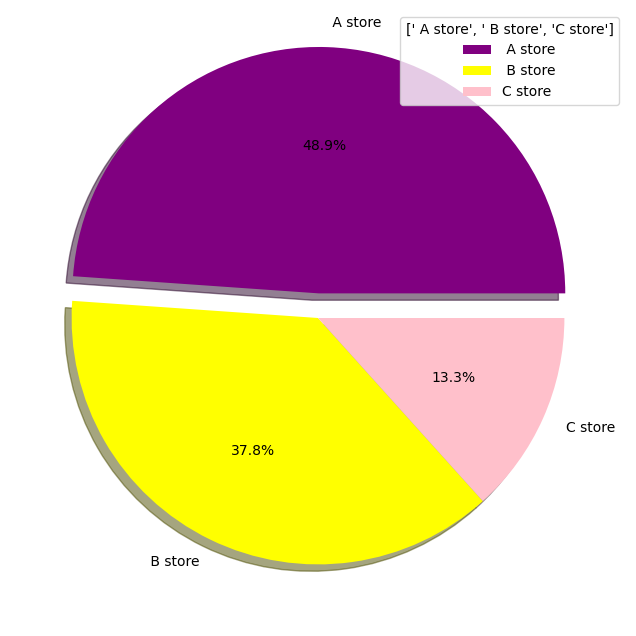

In [34]:
plt.figure(figsize=(8,8))

plt.pie(sizes,labels = labels, startangle=0,explode=[0.1,0,0], shadow=True, colors=['purple','yellow','pink'], autopct ='%1.1f%%')

plt.legend(title= labels)
plt.show()

In [35]:
train_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [36]:
labels = ['store','date', 'Weekly_Sales', 'Holiday_Flag','Fuel_Price','CPI', 'Unemployment']

In [37]:
sizes =[(10/(40))*100, (20/(40))*100, (30/(40))*100,(25/(40))*100,(5/(40))*100,(15/(40))*100,(22/(40))*100]

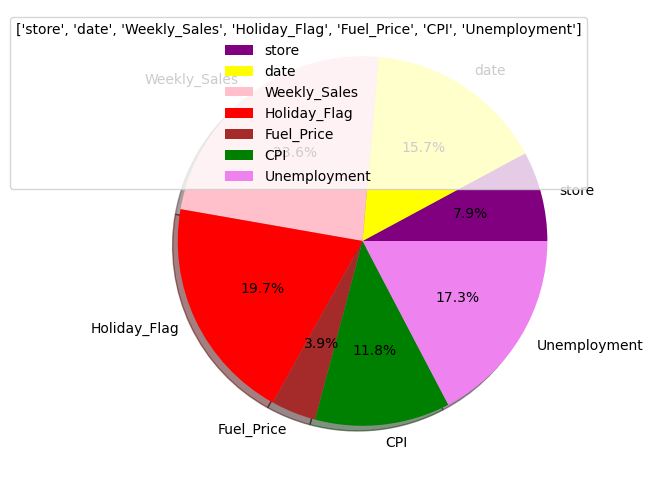

In [38]:

plt.figure(figsize=(20,6))
plt.pie(sizes,labels =labels, startangle=0, shadow=True, colors=['purple','yellow','pink','red','brown','green','violet'], autopct ='%1.1f%%')

plt.legend(title=labels)
plt.show()

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x273b2a53490>,
 [Text(-1.073561123911563, 0.23972174124543214, '0'),
  Text(1.0735611183004703, -0.23972176637394407, '1')],
 [Text(-0.5855787948608525, 0.13075731340659932, '93.0%'),
  Text(0.5855787918002564, -0.13075732711306037, '7.0%')])

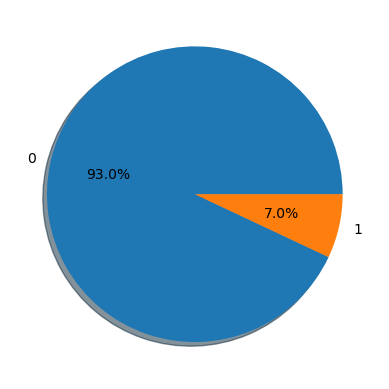

In [40]:
labels = train_df['Holiday_Flag'].value_counts().index # Taking the all index
values = train_df['Holiday_Flag'].value_counts().values  # Taking the all values

colors=train_df['Holiday_Flag']

plt.pie(values,labels=labels,startangle=0, shadow=True,autopct ='%1.1f%%') 


In [41]:
#load all libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder

In [42]:
train_df = pd.read_csv(r"C:\Users\GOPI CHAND\Downloads\folder1\Walmart DataSet.csv")
features_df = pd.read_csv(r"C:\Users\GOPI CHAND\Downloads\folder1\Walmart DataSet.csv")
stores_df =pd.read_csv(r"C:\Users\GOPI CHAND\Downloads\folder1\Walmart DataSet.csv")
test_df =pd.read_csv(r"C:\Users\GOPI CHAND\Downloads\folder1\Walmart DataSet.csv")
df =pd.read_csv(r"C:\Users\GOPI CHAND\Downloads\folder1\Walmart DataSet.csv")
dataset=pd.read_csv(r"C:\Users\GOPI CHAND\Downloads\folder1\Walmart DataSet.csv")
train_df.head

<bound method NDFrame.head of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

         

In [43]:
test_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [44]:
test_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [45]:
test_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [47]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [48]:

import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df =pd.read_csv(r"C:\Users\GOPI CHAND\Downloads\folder1\Walmart DataSet.csv")

In [50]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [52]:
from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


C:\Users\GOPI CHAND\AppData\Local\Temp\ipykernel_9160\2246529547.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['Date'] = pd.to_datetime(dataset['Date'])
C:\Users\GOPI CHAND\AppData\Local\Temp\ipykernel_9160\2246529547.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_df['Date'] = pd.to_datetime(train_df['Date'])
C:\Users\GOPI CHAND\AppData\Local\Temp\ipykernel_9160\2246529547.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_df['Date'] = pd.to_datetime(test_df['Date'])


In [53]:
dataset['Week'] = dataset.Date.dt.week # for the week data
dataset['Year'] = dataset.Date.dt.year # for the year data

dataset.head()

C:\Users\GOPI CHAND\AppData\Local\Temp\ipykernel_9160\1743915963.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset['Week'] = dataset.Date.dt.week # for the week data


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,17,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,48,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,18,2010


In [54]:
dataset.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Year
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,19,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,50,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42,2012
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,43,2012


In [55]:
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,26.000000,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,14.511794,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,14.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,26.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,38.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,52.000000,2012.000000


In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Week          6435 non-null   int64         
 9   Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 502.9 KB


In [57]:
dataset['Type'] = dataset.Date.dt.week # for the type
dataset['size'] = dataset.Date.dt.year#size
dataset.head()

C:\Users\GOPI CHAND\AppData\Local\Temp\ipykernel_9160\941173968.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset['Type'] = dataset.Date.dt.week # for the type


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Year,Type,size
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,17,2010,17,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,48,2010,48,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2010,7,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2010,8,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,18,2010,18,2010


In [58]:
dataset.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Year,Type,size
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,39,2012,39,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,19,2012,19,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,50,2012,50,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,42,2012,42,2012
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,43,2012,43,2012


In [59]:
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Year,Type,size
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,26.000000,2010.965035,26.000000,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,14.511794,0.797019,14.511794,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,2010.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,14.000000,2010.000000,14.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,26.000000,2011.000000,26.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,38.000000,2012.000000,38.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,52.000000,2012.000000,52.000000,2012.000000


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Week          6435 non-null   int64         
 9   Year          6435 non-null   int64         
 10  Type          6435 non-null   int64         
 11  size          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 603.4 KB


In [61]:
train_merge = train_df.merge(dataset, how='inner', on=['Store', 'Date', 'Holiday_Flag']).sort_values(by=['Store','Date']).reset_index(drop=True)

In [62]:
test_merge = test_df.merge(dataset, how='inner', on=['Store', 'Date', 'Holiday_Flag']).sort_values(by=['Store','Date']).reset_index(drop=True)

In [63]:
def scatter(train_merge, column):
    plt.figure()
    plt.scatter(train_merge[column] , train_merge['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)




<function matplotlib.pyplot.show(close=None, block=None)>

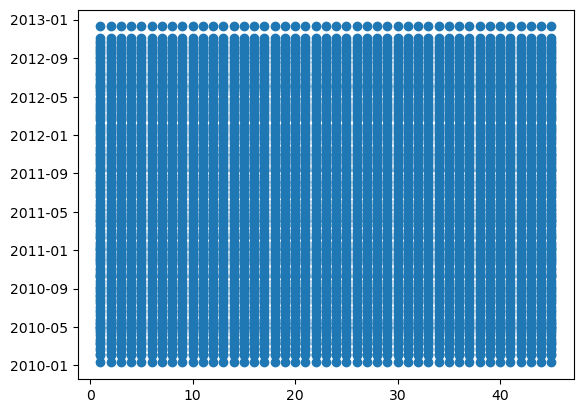

In [64]:


plt.scatter(train_merge['Store'],train_merge['Date'])

plt.show

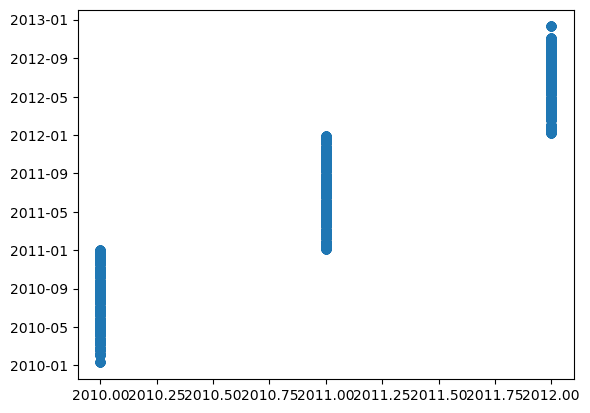

In [65]:
plt.scatter(train_merge['size'],train_merge['Date'])

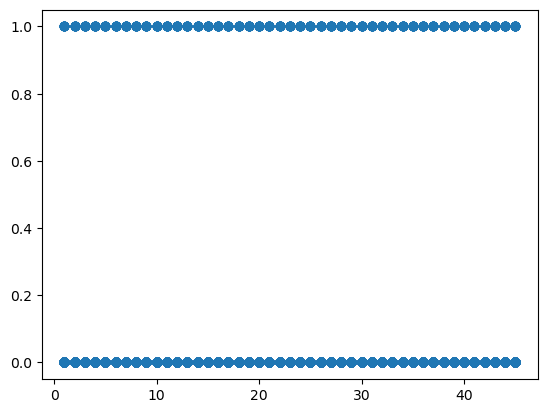

In [66]:
plt.scatter(train_merge['Store'],train_merge['Holiday_Flag'])

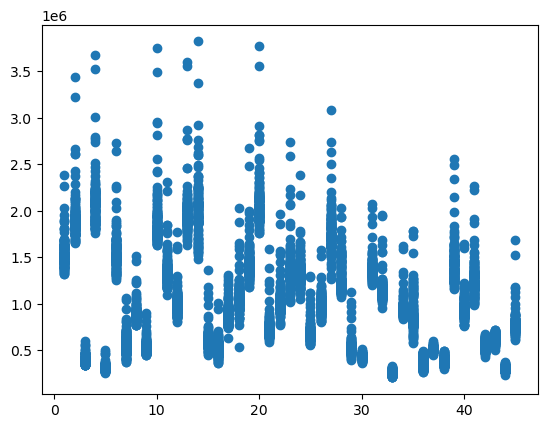

In [67]:
plt.scatter(df['Store'],df['Weekly_Sales'])

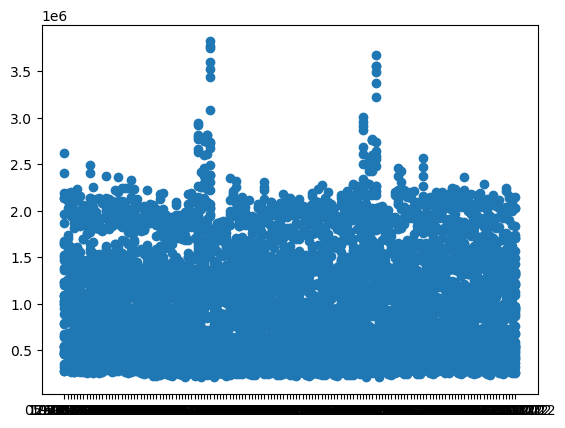

In [68]:
plt.scatter(df['Date'],df['Weekly_Sales'])

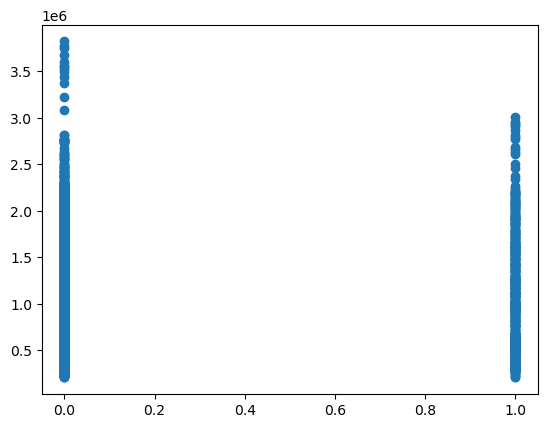

In [69]:
plt.scatter(df['Holiday_Flag'],df['Weekly_Sales'])

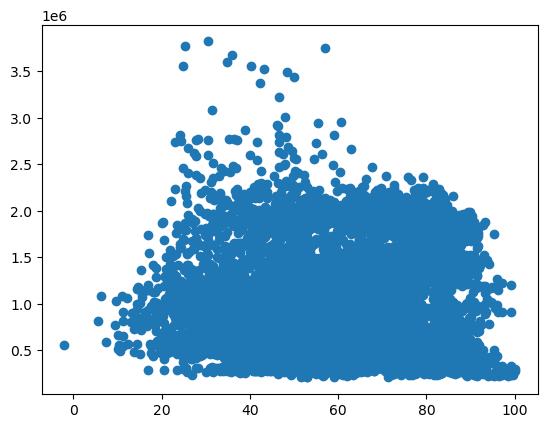

In [70]:
plt.scatter(df['Temperature'],df['Weekly_Sales'])

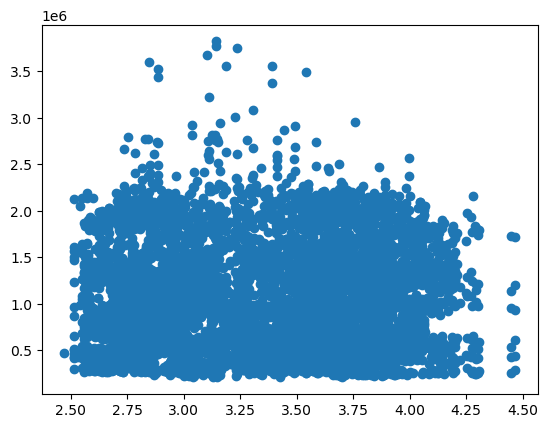

In [71]:
plt.scatter(df['Fuel_Price'],df['Weekly_Sales'])

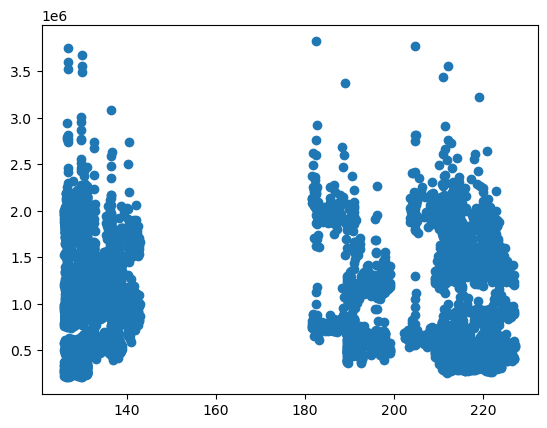

In [72]:
plt.scatter(df['CPI'],df['Weekly_Sales'])

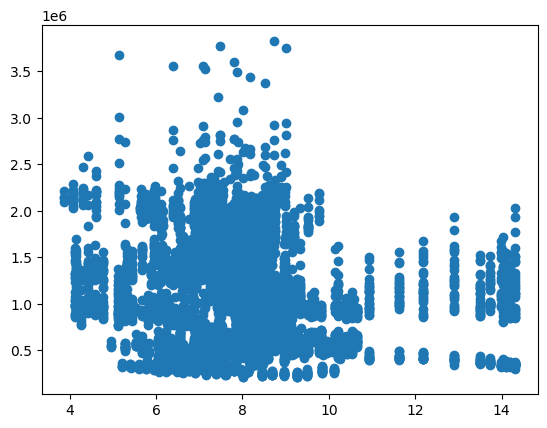

In [73]:
plt.scatter(df['Unemployment'],df['Weekly_Sales'])

In [74]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [75]:
stores_df =pd.read_csv(r"C:\Users\GOPI CHAND\Downloads\folder1\Walmart DataSet.csv")

In [76]:
stores_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [77]:
 data = pd.concat([stores_df['Date'],train_df ['Weekly_Sales']], axis=1)

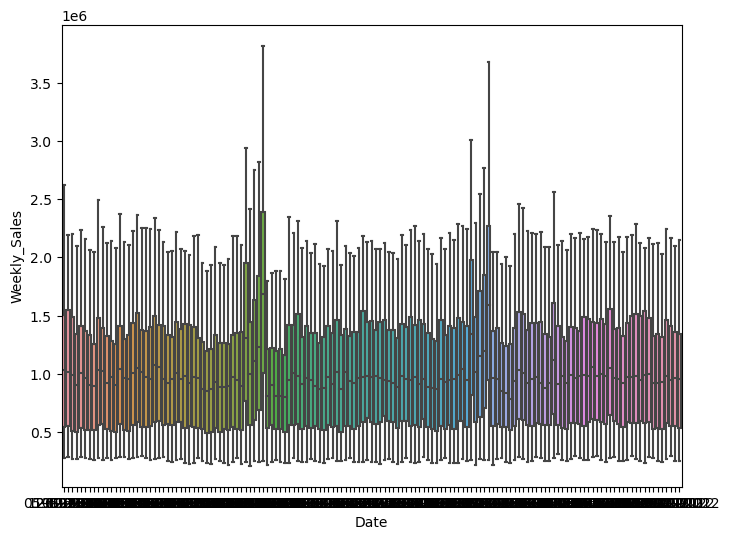

In [78]:
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x= 'Date', y= 'Weekly_Sales', data = data)

In [79]:
data = pd.concat([stores_df['Date'],train_df ['Store']], axis=1)

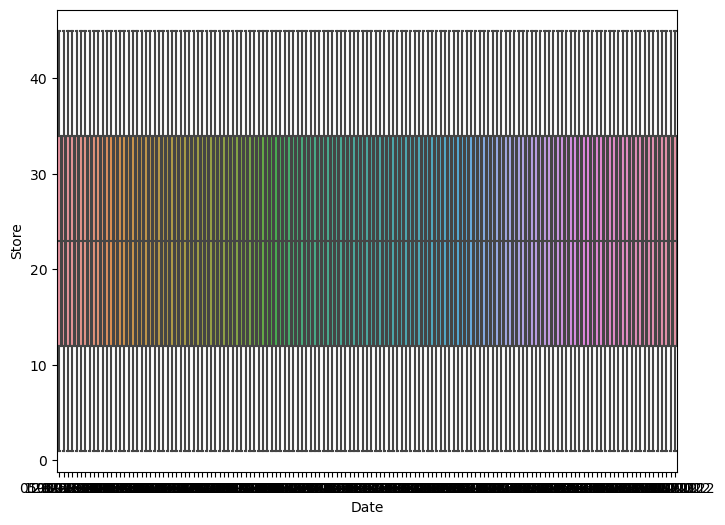

In [80]:
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x= 'Date', y= 'Store', data = data)

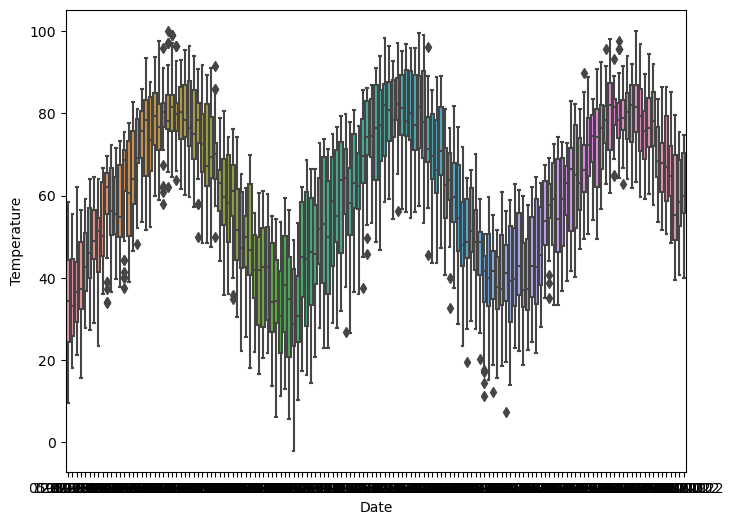

In [81]:
data = pd.concat([stores_df['Date'],train_df ['Temperature']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x= 'Date', y= 'Temperature', data = data)

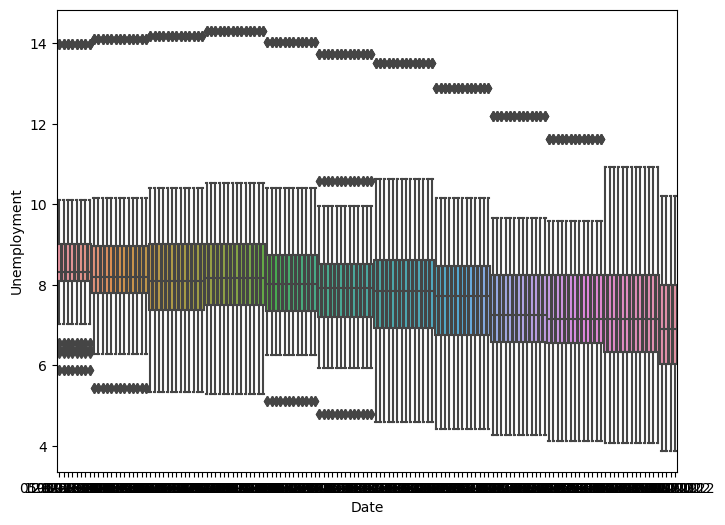

In [82]:
data = pd.concat([stores_df['Date'],train_df ['Unemployment']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x= 'Date', y= 'Unemployment', data = data)

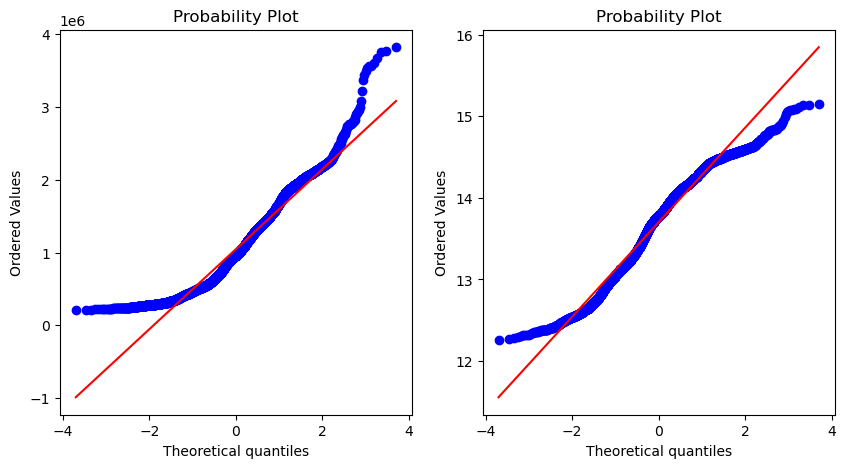

In [83]:
import scipy
fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
res = scipy.stats.probplot(train_df.loc[train_df['Weekly_Sales']>0,'Weekly_Sales'], plot=plt)
fig.add_subplot(1,2,2)
res = scipy.stats.probplot(np.log1p(train_df.loc[train_df['Weekly_Sales']>0,'Weekly_Sales']), plot=plt)

C:\Users\GOPI CHAND\AppData\Local\Temp\ipykernel_9160\3846332276.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_over_zero)


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

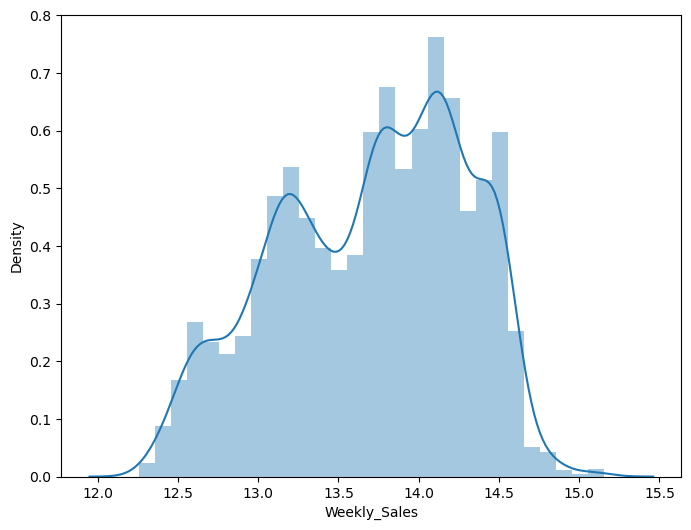

In [84]:
train_df_over_zero =train_df[train_df['Weekly_Sales']>0]
train_df_below_zero =train_df[train_df['Weekly_Sales']<=0]
sales_over_zero = np.log1p(train_df_over_zero['Weekly_Sales'])
f, ax = plt.subplots(figsize=(8,6))
sns.distplot(sales_over_zero)



(6435, 8)
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-01-10     1453330.0           0.0         72.0         3.0   
1      1 2010-02-04     1594968.0           0.0         62.0         3.0   
2      1 2010-02-07     1492418.0           0.0         81.0         3.0   
3      1 2010-02-19     1611968.0           0.0         40.0         3.0   
4      1 2010-02-26     1409728.0           0.0         47.0         3.0   

     CPI  Unemployment  
0  212.0           8.0  
1  211.0           8.0  
2  211.0           8.0  
3  211.0           8.0  
4  211.0           8.0  


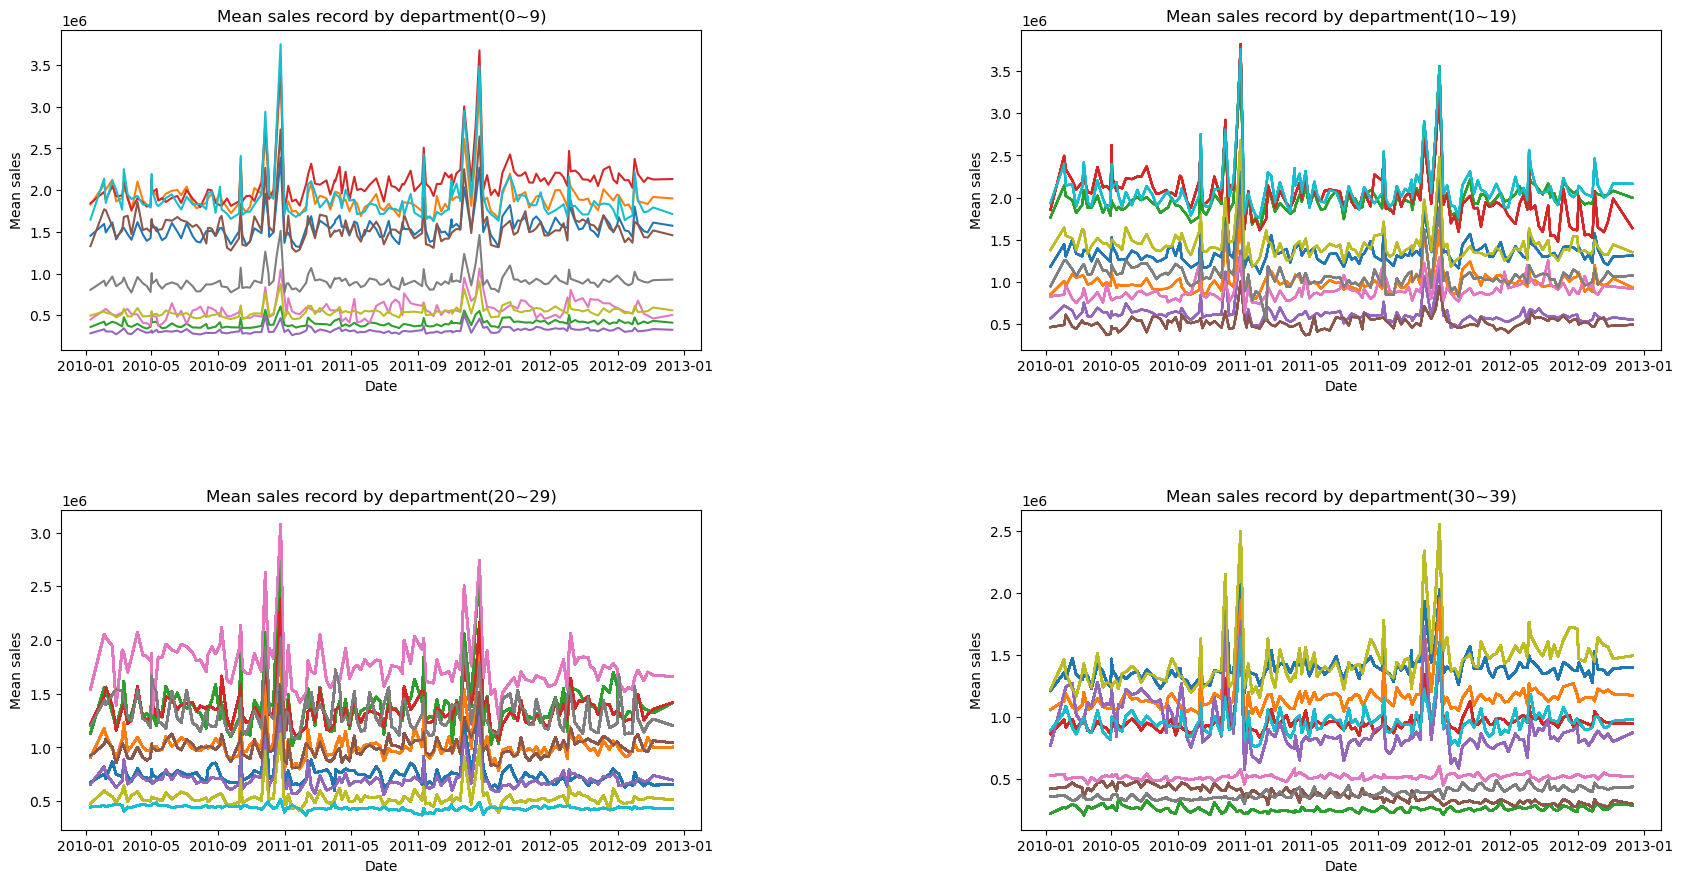

In [85]:
grouped=train_df.groupby(['Store','Date']).mean().round(0).reset_index()
print(grouped.shape)
print(grouped.head())
data=grouped[['Store','Date','Weekly_Sales']]

Store=train_df['Store'].unique()
Store.sort()
Store_1=Store[0:10]
Store_2=Store[10:20]
Store_3=Store[20:30]
Store_4=Store[30:40]


fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

for i in Store_1:
    data_1=data[data['Store']==i]
    ax[0,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Store_1_mean_Sales')
    
    for i in Store_2 :
        data_1=data[data['Store']==i]
        ax[0,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Store_1_mean_Sales')
        
        for i in Store_3 :
    
            data_1=data[data['Store']==i]
            ax[1,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Store_1_mean_Sales')
        
        for i in Store_4 :
            data_1=data[data['Store']==i]
            ax[1,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Store_1_mean_Sales')
        
        
        
        
        ax[0,0].set_title('Mean sales record by department(0~9)')
        ax[0,1].set_title('Mean sales record by department(10~19)')
        ax[1,0].set_title('Mean sales record by department(20~29)')
        ax[1,1].set_title('Mean sales record by department(30~39)')
        
        
        ax[0,0].set_ylabel('Mean sales')
        ax[0,0].set_xlabel('Date')
        ax[0,1].set_ylabel('Mean sales')
        ax[0,1].set_xlabel('Date')
        ax[1,0].set_ylabel('Mean sales')
        ax[1,0].set_xlabel('Date')
        ax[1,1].set_ylabel('Mean sales')
        ax[1,1].set_xlabel('Date')
        
        
        
plt.show()

In [86]:
train_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


(6435, 8)
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-01-10     1453330.0           0.0         72.0         3.0   
1      1 2010-02-04     1594968.0           0.0         62.0         3.0   
2      1 2010-02-07     1492418.0           0.0         81.0         3.0   
3      1 2010-02-19     1611968.0           0.0         40.0         3.0   
4      1 2010-02-26     1409728.0           0.0         47.0         3.0   

     CPI  Unemployment  
0  212.0           8.0  
1  211.0           8.0  
2  211.0           8.0  
3  211.0           8.0  
4  211.0           8.0  


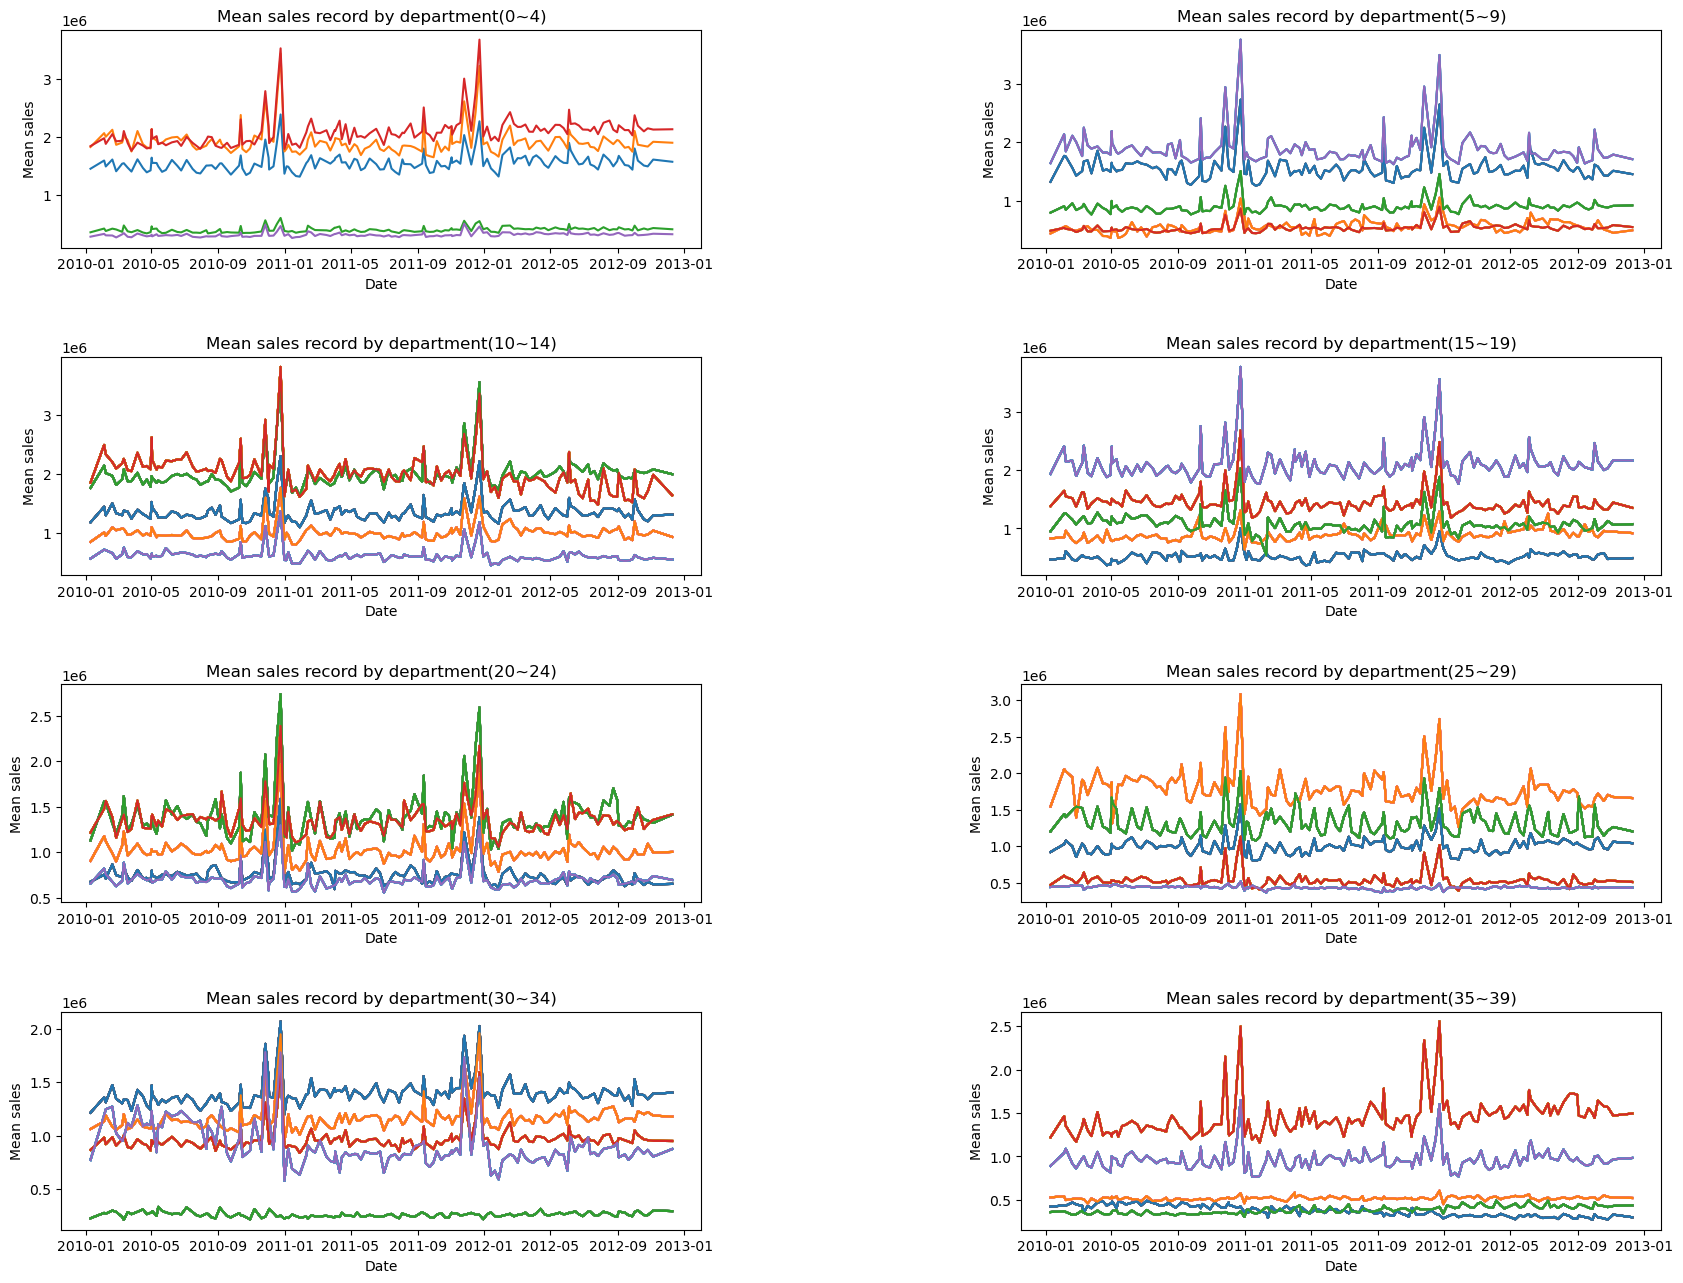

In [87]:
grouped=train_df.groupby(['Store','Date']).mean().round(0).reset_index()
print(grouped.shape)
print(grouped.head())
data=grouped[['Store','Date','Weekly_Sales']]

Store=train_df['Store'].unique()
Store.sort()
Store_1=Store[0:5]
Store_2=Store[5:10]
Store_3=Store[10:15]
Store_4=Store[15:20]
Store_5=Store[20:25]
Store_6=Store[25:30]
Store_7=Store[30:35]
Store_8=Store[35:40]



fig, ax = plt.subplots(4,2,figsize=(20,15))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

for i in Store_1:
    data_1=data[data['Store']==i]
    ax[0,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Store_1_mean_Sales')
    
    for i in Store_2 :
        data_1=data[data['Store']==i]
        ax[0,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Store_1_mean_Sales')
        
        for i in Store_3 :
    
            data_1=data[data['Store']==i]
            ax[1,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Store_1_mean_Sales')
        
        for i in Store_4 :
            data_1=data[data['Store']==i]
            ax[1,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Store_1_mean_Sales')
            
        for i in Store_5 :
            data_1=data[data['Store']==i]
            ax[2,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Store_1_mean_Sales')
            
        for i in Store_6:
            data_1=data[data['Store']==i]
            ax[2,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Store_1_mean_Sales')
    
        for i in Store_7 :
            data_1=data[data['Store']==i]
            ax[3,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Store_1_mean_Sales')
        
        for i in Store_8 :
            data_1=data[data['Store']==i]
            ax[3,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Store_1_mean_Sales')
        
            
            
        ax[0,0].set_title('Mean sales record by department(0~4)')
        ax[0,1].set_title('Mean sales record by department(5~9)' )
        ax[1,0].set_title('Mean sales record by department(10~14)')
        ax[1,1].set_title('Mean sales record by department(15~19)')
        ax[2,0].set_title('Mean sales record by department(20~24)')
        ax[2,1].set_title('Mean sales record by department(25~29)')
        ax[3,0].set_title('Mean sales record by department(30~34)')
        ax[3,1].set_title('Mean sales record by department(35~39)')
          
        
        
        ax[0,0].set_ylabel('Mean sales')
        ax[0,0].set_xlabel('Date')
        ax[0,1].set_ylabel('Mean sales')
        ax[0,1].set_xlabel('Date')
        ax[1,0].set_ylabel('Mean sales')
        ax[1,0].set_xlabel('Date')
        ax[1,1].set_ylabel('Mean sales')
        ax[1,1].set_xlabel('Date')
        ax[2,0].set_ylabel('Mean sales')
        ax[2,0].set_xlabel('Date')
        ax[2,1].set_ylabel('Mean sales')
        ax[2,1].set_xlabel('Date')
        ax[3,0].set_ylabel('Mean sales')
        ax[3,0].set_xlabel('Date')
        ax[3,1].set_ylabel('Mean sales')
        ax[3,1].set_xlabel('Date')
        
        
        
plt.show()



<Axes: >

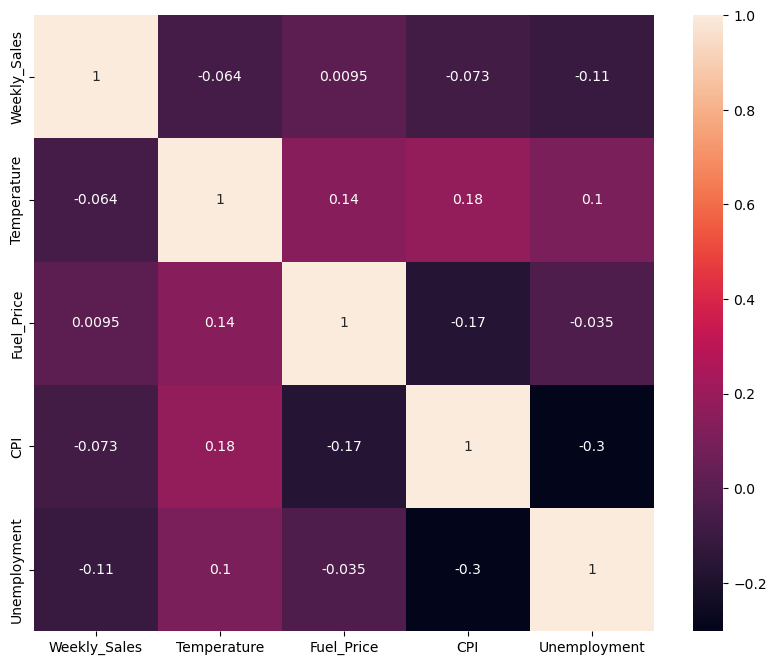

In [88]:
feature_df = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',]
plt.figure(figsize = (10,8))
sns.heatmap(df[feature_df].corr(), annot = True)

In [89]:

import pandas as pd
import matplotlib.pyplot as plt

In [90]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [91]:

df.groupby(['Store', 'Date','Weekly_Sales']).value_counts().keys().tolist

<bound method IndexOpsMixin.tolist of MultiIndex([( 1, '01-04-2011', 1495064.75, 0, 59.17, 3.524, 214.8371664, ...),
            ( 1, '01-06-2012', 1624477.58, 0, 77.95, 3.501, 221.7472139, ...),
            ( 1, '01-07-2011', 1488538.09, 0, 85.55, 3.524, 215.1841368, ...),
            ( 1, '01-10-2010',  1453329.5, 0, 71.89, 2.603, 211.6719895, ...),
            ( 1, '02-03-2012', 1688420.76, 0, 60.96,  3.63, 220.8480454, ...),
            ( 1, '02-04-2010', 1594968.28, 0, 62.27, 2.719, 210.8204499, ...),
            ( 1, '02-07-2010', 1492418.14, 0, 80.91, 2.669, 211.2235333, ...),
            ( 1, '02-09-2011', 1550229.22, 0, 87.83, 3.533, 215.7971409, ...),
            ( 1, '02-12-2011', 1584083.95, 0, 48.91, 3.172, 218.7147333, ...),
            ( 1, '03-02-2012', 1636339.65, 0, 56.55,  3.36, 220.1720153, ...),
            ...
            (45, '29-06-2012',  773367.71, 0, 75.22, 3.506, 191.0992462, ...),
            (45, '29-07-2011',  704680.97, 0, 81.31, 3.829, 186.2955962, ...)

(array([135., 135., 135., 135., 135., 135.,  90., 135., 135., 135., 135.,
        135.,  90., 135., 135., 135., 135., 135.,  90., 135., 135., 135.,
        135., 135.,  90., 135., 135., 135., 135., 135., 135.,  90., 135.,
        135., 135., 135., 135.,  90., 135., 135., 135., 135., 135.,  90.,
        135., 135., 135., 135., 135., 135.]),
 array([  0.  ,   2.84,   5.68,   8.52,  11.36,  14.2 ,  17.04,  19.88,
         22.72,  25.56,  28.4 ,  31.24,  34.08,  36.92,  39.76,  42.6 ,
         45.44,  48.28,  51.12,  53.96,  56.8 ,  59.64,  62.48,  65.32,
         68.16,  71.  ,  73.84,  76.68,  79.52,  82.36,  85.2 ,  88.04,
         90.88,  93.72,  96.56,  99.4 , 102.24, 105.08, 107.92, 110.76,
        113.6 , 116.44, 119.28, 122.12, 124.96, 127.8 , 130.64, 133.48,
        136.32, 139.16, 142.  ]),
 <BarContainer object of 50 artists>)

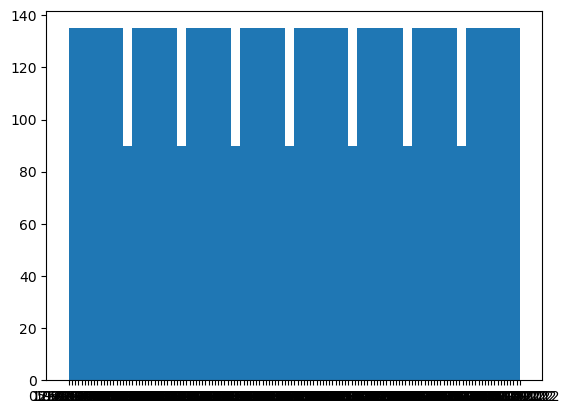

In [94]:

plt.hist(df['Date'], bins=50)

(array([ 47., 123., 199., 163., 128., 164., 190., 193., 277., 213., 184.,
        159., 140., 116., 111., 120., 107., 113., 150., 167., 188., 173.,
        112., 127., 116.,  95., 130.,  99., 116., 114., 138., 132., 143.,
        132., 116.,  76.,  97.,  78.,  62.,  75.,  50.,  56.,  50.,  57.,
         63.,  80.,  96.,  83.,  74.,  59.,  65.,  66.,  43.,  40.,  33.,
         25.,  19.,  11.,   6.,   6.,   6.,   5.,   6.,   4.,   3.,   2.,
          5.,   3.,   2.,   2.,   9.,   1.,   3.,   1.,   1.,   3.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   1.,   2.,   1.,   0.,   0.,   1.,   0.,   2.,
          1.]),
 array([ 209986.25 ,  246073.252,  282160.254,  318247.256,  354334.258,
         390421.26 ,  426508.262,  462595.264,  498682.266,  534769.268,
         570856.27 ,  606943.272,  643030.274,  679117.276,  715204.278,
         751291.28 ,  787378.282,  823465.284,  859552.286,  895639.288,
         931726.29 ,  9678

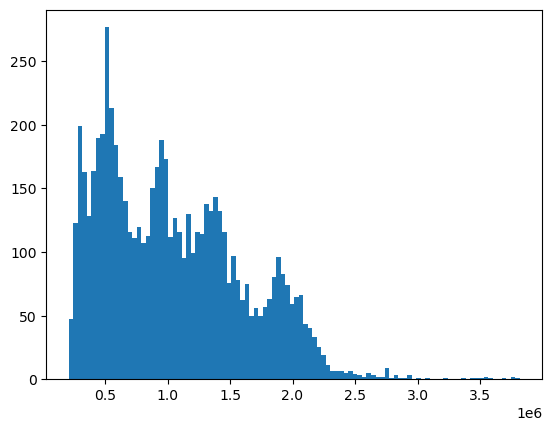

In [100]:

plt.hist(df['Weekly_Sales'],bins=100)

(array([143.,   0., 143.,   0., 143.,   0., 143.,   0.,   0., 143.,   0.,
        143.,   0., 143.,   0., 143.,   0.,   0., 143.,   0., 143.,   0.,
        143.,   0.,   0., 143.,   0., 143.,   0., 143.,   0., 143.,   0.,
          0., 143.,   0., 143.,   0., 143.,   0., 143.,   0.,   0., 143.,
          0., 143.,   0., 143.,   0.,   0., 143.,   0., 143.,   0., 143.,
          0., 143.,   0.,   0., 143.,   0., 143.,   0., 143.,   0., 143.,
          0.,   0., 143.,   0., 143.,   0., 143.,   0.,   0., 143.,   0.,
        143.,   0., 143.,   0., 143.,   0.,   0., 143.,   0., 143.,   0.,
        143.,   0., 143.,   0.,   0., 143.,   0., 143.,   0., 143.,   0.,
        143.]),
 array([ 1.  ,  1.44,  1.88,  2.32,  2.76,  3.2 ,  3.64,  4.08,  4.52,
         4.96,  5.4 ,  5.84,  6.28,  6.72,  7.16,  7.6 ,  8.04,  8.48,
         8.92,  9.36,  9.8 , 10.24, 10.68, 11.12, 11.56, 12.  , 12.44,
        12.88, 13.32, 13.76, 14.2 , 14.64, 15.08, 15.52, 15.96, 16.4 ,
        16.84, 17.28, 17.72, 18.16

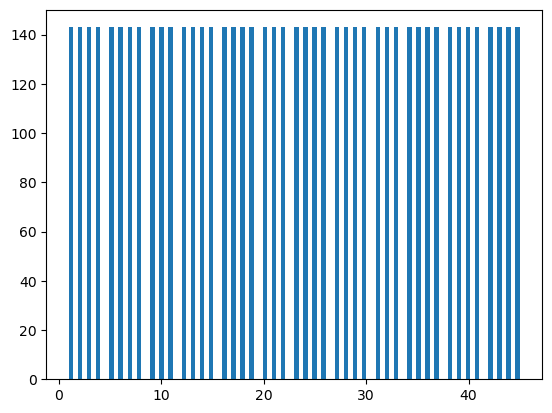

In [101]:
plt.hist(df['Store'],bins=100)

(array([  1.,   0.,  16.,  25.,  31.,  66.,  38.,  84.,  69.,  94.,  42.,
         88., 161.,  88., 123., 113., 127.,  91., 108.,  75.,  53.,  49.,
         62.,  98.,  63.,  90.,  57.,  74.,  93.,  69.,  39.,  55., 101.,
         52.,  59.,  41.,  27.,  35.,  74.,  72., 106.,  45.,  26.,  54.,
         59.,  50.,  73.,  66.,  37.,  60.,  89.,  93., 115., 133., 135.,
        120.,  98., 133., 172., 116., 102., 102.,  96., 150.,  85., 116.,
        118., 146.,  79.,  49., 116., 131.,  74.,  37.,  50.,  55.,  60.,
         55.,  43.,  37.,  28.,  28.,  32.,  23.,  22.,  27.,  27.,   7.,
          0.,   9.,  18.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         12.]),
 array([2.472  , 2.49196, 2.51192, 2.53188, 2.55184, 2.5718 , 2.59176,
        2.61172, 2.63168, 2.65164, 2.6716 , 2.69156, 2.71152, 2.73148,
        2.75144, 2.7714 , 2.79136, 2.81132, 2.83128, 2.85124, 2.8712 ,
        2.89116, 2.91112, 2.93108, 2.95104, 2.971  , 2.99096, 3.01092,
        3.03088, 3.05084, 3.0708 ,

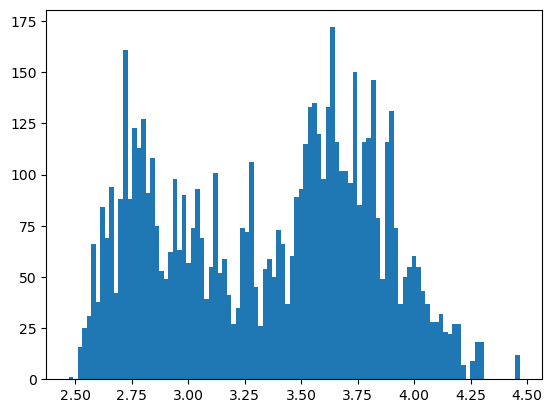

In [104]:
plt.hist(df['Fuel_Price'],bins=100)

In [103]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


(array([517.,  88., 209., 286., 418., 167., 304.,  72.,  88., 115., 319.,
        219., 134.,  30.,  72.,  75.,  33.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,
         74.,  24.,   8.,  16.,  36.,  10.,  16., 118.,  62., 112.,  72.,
         40.,  32.,  40.,  36.,  92.,  48.,  12.,   0.,   0.,   9.,  56.,
         77.,  21.,  16.,  28.,  47.,  76., 222., 211., 100., 129., 306.,
        165.,  77.,  74., 128., 103., 132., 164.,  81.,  61.,  43.,  80.,
         25.]),
 array([126.064     , 127.07568807, 128.08737614, 129.0990642 ,
        130.11075227, 131.12244034, 132.13412841, 133.14581648,
        134.15750454, 135.16919261, 136.18088068, 137.19256875,
        138.20425682, 139.21594488, 140.22763295, 141.23932102,
        142.25100909, 143.26269716, 144.27438522, 145.28607329

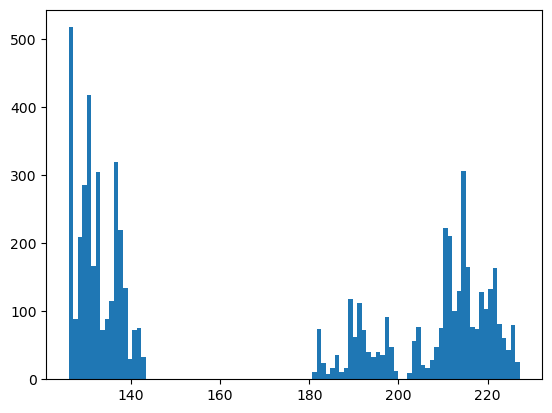

In [107]:
plt.hist(df['CPI'], bins=100)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,
          4.,   5.,   3.,   2.,   5.,  12.,   6.,  11.,  11.,  14.,  13.,
         26.,  24.,  33.,  40.,  25.,  42.,  34.,  45.,  38.,  52.,  51.,
         44.,  52.,  58.,  56.,  82.,  74.,  49.,  57.,  75.,  78.,  83.,
         77.,  68., 112., 106.,  89., 115.,  91., 124., 104., 100., 102.,
        124.,  86., 125., 100., 117., 122.,  99., 107., 113., 127., 139.,
        115., 123., 140., 154., 173., 153., 108., 143., 119., 116., 121.,
        115., 124.,  96.,  75., 111., 125., 101., 101., 104.,  77.,  77.,
         60.,  65.,  45.,  49.,  23.,  18.,  11.,  14.,   9.,   6.,   2.,
          7.]),
 array([-2.0600e+00, -1.0380e+00, -1.6000e-02,  1.0060e+00,  2.0280e+00,
         3.0500e+00,  4.0720e+00,  5.0940e+00,  6.1160e+00,  7.1380e+00,
         8.1600e+00,  9.1820e+00,  1.0204e+01,  1.1226e+01,  1.2248e+01,
         1.3270e+01,  1.4292e+01,  1.5314e+01,  1.6336e+01,  1.7358e+01,
         1.8380e+01,  1.94

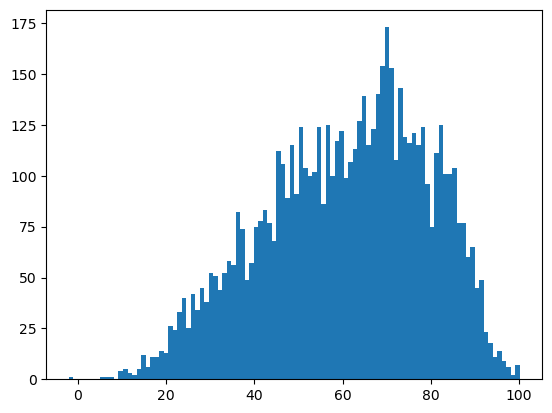

In [108]:
plt.hist(df['Temperature'], bins=100)

(array([  4.,  13.,  60.,  26.,  13.,  26.,  41.,   0.,  26.,   0.,   4.,
         28.,  17.,  71.,  56.,  17.,  44.,  39.,  56.,  81.,  34.,  94.,
         54., 126., 140., 191., 115.,  67., 187., 167.,  99., 135., 159.,
        196., 171., 192., 117., 183., 303., 167., 240., 361., 204., 166.,
        306., 115., 175.,  71., 130.,  99.,  83.,  69.,  40.,  26.,  94.,
         26.,  42.,  27.,  13.,  16.,  79.,  12.,  37.,  14.,  54.,   0.,
          0.,  39.,   0.,   0.,   0.,   0.,   0.,   0.,  39.,   0.,   0.,
          0.,   0.,  39.,   0.,   0.,   0.,   0.,   0.,   0.,  39.,   0.,
          0.,   0.,   0.,   0.,  42.,   0.,  39.,   0.,  24.,  75.,  39.,
         42.]),
 array([ 3.879  ,  3.98334,  4.08768,  4.19202,  4.29636,  4.4007 ,
         4.50504,  4.60938,  4.71372,  4.81806,  4.9224 ,  5.02674,
         5.13108,  5.23542,  5.33976,  5.4441 ,  5.54844,  5.65278,
         5.75712,  5.86146,  5.9658 ,  6.07014,  6.17448,  6.27882,
         6.38316,  6.4875 ,  6.59184,  6.69618

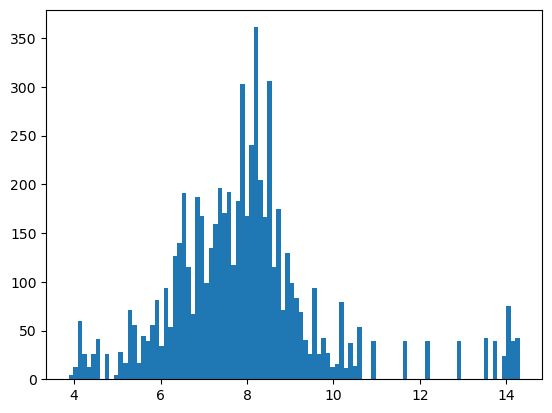

In [109]:
plt.hist(df['Unemployment'], bins=100)